# Lab : Image Classification using Convolutional Neural Networks

At the end of this laboratory, you would get familiarized with

*   Creating deep networks using Keras
*   Steps necessary in training a neural network
*   Prediction and performance analysis using neural networks

---

# **In case you use a colaboratory environment**
By default, Colab notebooks run on CPU.
You can switch your notebook to run with GPU.

In order to obtain access to the GPU, you need to choose the tab Runtime and then select “Change runtime type” as shown in the following figure:

![Changing runtime](https://miro.medium.com/max/747/1*euE7nGZ0uJQcgvkpgvkoQg.png)

When a pop-up window appears select GPU. Ensure “Hardware accelerator” is set to GPU.

# **Working with a new dataset: CIFAR-10**

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images. More information about CIFAR-10 can be found [here](https://www.cs.toronto.edu/~kriz/cifar.html).

In Keras, the CIFAR-10 dataset is also preloaded in the form of four Numpy arrays. x_train and y_train contain the training set, while x_test and y_test contain the test data. The images are encoded as Numpy arrays and their corresponding labels ranging from 0 to 9.

Your task is to:

*   Visualize the images in CIFAR-10 dataset. Create a 10 x 10 plot showing 10 random samples from each class.
*   Convert the labels to one-hot encoded form.
*   Normalize the images.




In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

2025-05-20 14:33:20.766835: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 51s 0us/step


In [ ]:
print("Training data shape:", x_train.shape)
print("Test data shape:", x_test.shape)


Training data shape: (50000, 32, 32, 3)
Test data shape: (10000, 32, 32, 3)


In [3]:
class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer',
               'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

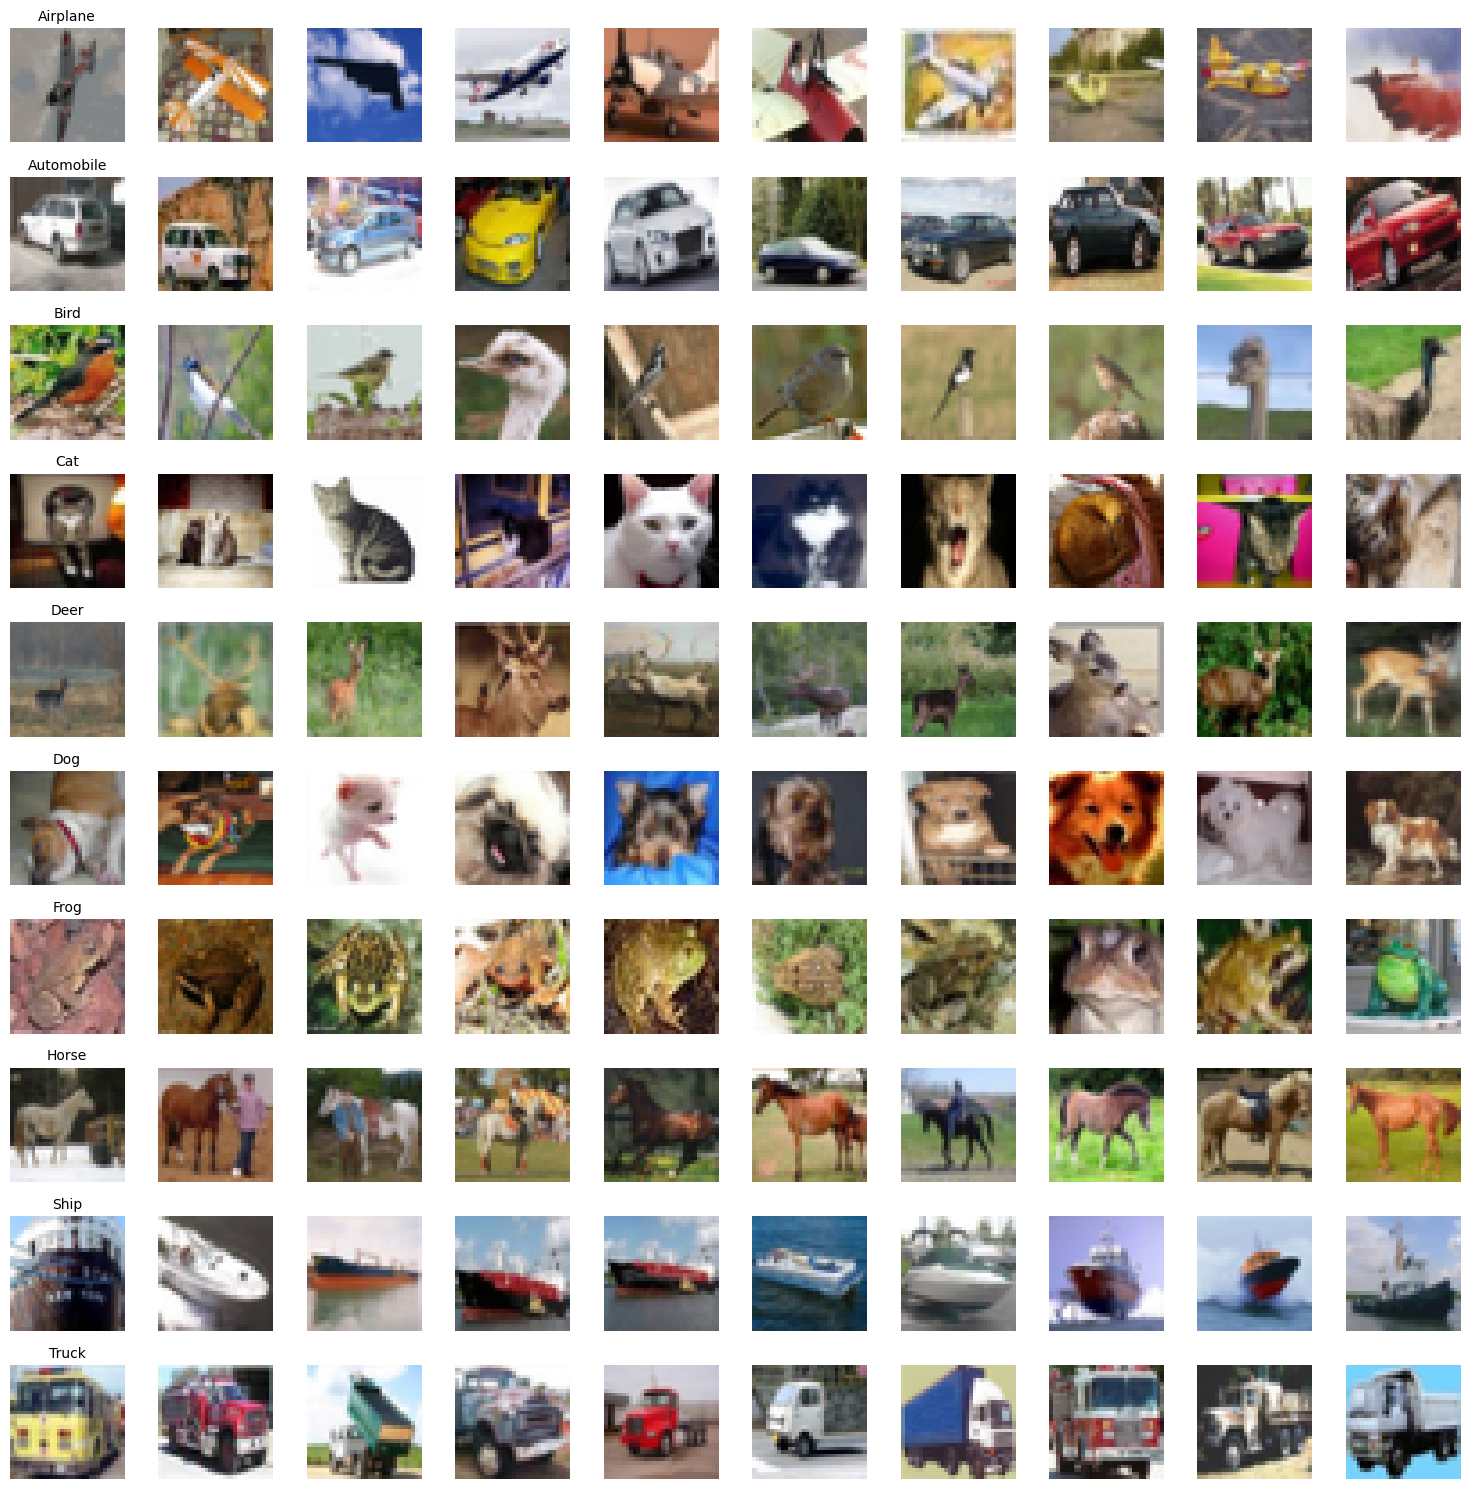

In [4]:
plt.figure(figsize=(15, 15))
for class_idx in range(10):
    # Find all images of the current class
    idxs = np.where(y_train == class_idx)[0]
    # Randomly pick 10
    selected_idxs = np.random.choice(idxs, 10, replace=False)

    for i, idx in enumerate(selected_idxs):
        plt_idx = class_idx * 10 + i + 1
        plt.subplot(10, 10, plt_idx)
        plt.imshow(x_train[idx])
        plt.axis('off')
        if i == 0:
            plt.title(class_names[class_idx], fontsize=10)

plt.tight_layout()
plt.show()


In [5]:
y_train_onehot = to_categorical(y_train, 10)
y_test_onehot = to_categorical(y_test, 10)

print("One-hot label shape:", y_train_onehot.shape)


One-hot label shape: (50000, 10)


In [6]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0


## Define the following model (same as the one in tutorial)

For the convolutional front-end, start with a single convolutional layer with a small filter size (3,3) and a modest number of filters (32) followed by a max pooling layer. 

Use the input as (32,32,3). 

The filter maps can then be flattened to provide features to the classifier. 

Use a dense layer with 100 units before the classification layer (which is also a dense layer with softmax activation).

In [7]:
from keras.backend import clear_session
clear_session()

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Define the model
model = Sequential([
    # Convolutional layer
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    
    # Max pooling layer
    MaxPooling2D(pool_size=(2, 2)),
    
    # Flatten the output to feed into dense layer
    Flatten(),
    
    # Dense layer with 100 units
    Dense(100, activation='relu'),
    
    # Output layer with softmax
    Dense(10, activation='softmax')
])


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 50 epochs with a batch size of 512.

In [9]:
from tensorflow.keras.optimizers import SGD

model.compile(
    loss='categorical_crossentropy',
    optimizer=SGD(),  # Default learning rate is 0.01
    metrics=['accuracy']
)


In [11]:
history = model.fit(
    x_train, y_train_onehot,
    epochs=50,
    batch_size=512,
    validation_data=(x_test, y_test_onehot),
    verbose=2  # Shows progress per epoch
)


Epoch 1/50
98/98 - 11s - 111ms/step - accuracy: 0.3257 - loss: 1.9202 - val_accuracy: 0.3436 - val_loss: 1.8909
Epoch 2/50
98/98 - 11s - 112ms/step - accuracy: 0.3412 - loss: 1.8775 - val_accuracy: 0.3522 - val_loss: 1.8563
Epoch 3/50
98/98 - 13s - 136ms/step - accuracy: 0.3581 - loss: 1.8442 - val_accuracy: 0.3438 - val_loss: 1.8447
Epoch 4/50
98/98 - 9s - 96ms/step - accuracy: 0.3656 - loss: 1.8187 - val_accuracy: 0.3562 - val_loss: 1.8140
Epoch 5/50
98/98 - 10s - 97ms/step - accuracy: 0.3739 - loss: 1.7922 - val_accuracy: 0.3630 - val_loss: 1.8000
Epoch 6/50
98/98 - 9s - 93ms/step - accuracy: 0.3868 - loss: 1.7598 - val_accuracy: 0.3822 - val_loss: 1.7547
Epoch 7/50
98/98 - 9s - 94ms/step - accuracy: 0.3936 - loss: 1.7377 - val_accuracy: 0.3970 - val_loss: 1.7365
Epoch 8/50
98/98 - 9s - 92ms/step - accuracy: 0.3996 - loss: 1.7168 - val_accuracy: 0.4069 - val_loss: 1.6992
Epoch 9/50
98/98 - 9s - 92ms/step - accuracy: 0.4085 - loss: 1.6915 - val_accuracy: 0.4061 - val_loss: 1.7018
Epo

*   Plot the cross entropy loss curve and the accuracy curve

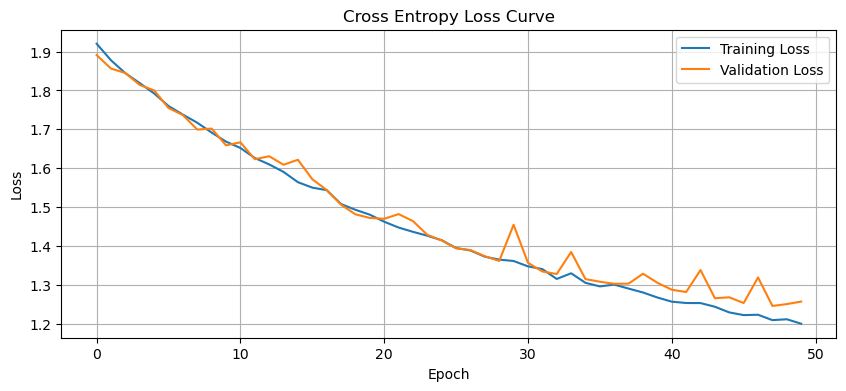

In [12]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.figure(figsize=(10, 4))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Cross Entropy Loss Curve')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()




## Defining Deeper Architectures: VGG Models

*   Define a deeper model architecture for CIFAR-10 dataset and train the new model for 50 epochs with a batch size of 512. We will use VGG model as the architecture.

Stack two convolutional layers with 32 filters, each of 3 x 3. 

Use a max pooling layer and next flatten the output of the previous layer and add a dense layer with 128 units before the classification layer. 

For all the layers, use ReLU activation function. 

Use same padding for the layers to ensure that the height and width of each layer output matches the input


In [13]:
from keras.backend import clear_session
clear_session()

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import SGD

# Define the deeper VGG-like model
vgg_model = Sequential([
    # First convolutional block
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    Conv2D(32, (3, 3), activation='relu', padding='same'),

    # Max pooling
    MaxPooling2D(pool_size=(2, 2)),

    # Flatten and dense layers
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])





In [15]:
vgg_model.compile(
    optimizer=SGD(),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [16]:
vgg_history = vgg_model.fit(
    x_train, y_train_onehot,
    epochs=50,
    batch_size=512,
    validation_data=(x_test, y_test_onehot),
    verbose=2
)


Epoch 1/50
98/98 - 42s - 430ms/step - accuracy: 0.1697 - loss: 2.2400 - val_accuracy: 0.2535 - val_loss: 2.1448
Epoch 2/50
98/98 - 45s - 454ms/step - accuracy: 0.2849 - loss: 2.0405 - val_accuracy: 0.3170 - val_loss: 1.9586
Epoch 3/50
98/98 - 40s - 406ms/step - accuracy: 0.3194 - loss: 1.9424 - val_accuracy: 0.3369 - val_loss: 1.8821
Epoch 4/50
98/98 - 38s - 389ms/step - accuracy: 0.3417 - loss: 1.8799 - val_accuracy: 0.3099 - val_loss: 1.9218
Epoch 5/50
98/98 - 37s - 381ms/step - accuracy: 0.3585 - loss: 1.8345 - val_accuracy: 0.3792 - val_loss: 1.7903
Epoch 6/50
98/98 - 37s - 376ms/step - accuracy: 0.3740 - loss: 1.7854 - val_accuracy: 0.3872 - val_loss: 1.7635
Epoch 7/50
98/98 - 38s - 388ms/step - accuracy: 0.3860 - loss: 1.7547 - val_accuracy: 0.3816 - val_loss: 1.7335
Epoch 8/50
98/98 - 37s - 373ms/step - accuracy: 0.3943 - loss: 1.7270 - val_accuracy: 0.3759 - val_loss: 1.7458
Epoch 9/50
98/98 - 37s - 372ms/step - accuracy: 0.4054 - loss: 1.6959 - val_accuracy: 0.4189 - val_loss:

*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 50 epochs with a batch size of 512.

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import SGD

# Define the model
vgg_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    Conv2D(32, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])


In [18]:
vgg_model.compile(
    loss='categorical_crossentropy',
    optimizer=SGD(),
    metrics=['accuracy']
)


In [19]:
vgg_history = vgg_model.fit(
    x_train, y_train_onehot,
    epochs=50,
    batch_size=512,
    validation_data=(x_test, y_test_onehot),
    verbose=2
)


Epoch 1/50
98/98 - 42s - 432ms/step - accuracy: 0.1611 - loss: 2.2719 - val_accuracy: 0.2002 - val_loss: 2.2198
Epoch 2/50
98/98 - 39s - 403ms/step - accuracy: 0.2558 - loss: 2.1185 - val_accuracy: 0.2655 - val_loss: 2.0210
Epoch 3/50
98/98 - 35s - 356ms/step - accuracy: 0.2946 - loss: 1.9890 - val_accuracy: 0.3067 - val_loss: 1.9394
Epoch 4/50
98/98 - 34s - 349ms/step - accuracy: 0.3274 - loss: 1.9133 - val_accuracy: 0.3461 - val_loss: 1.8548
Epoch 5/50
98/98 - 34s - 348ms/step - accuracy: 0.3465 - loss: 1.8603 - val_accuracy: 0.3662 - val_loss: 1.8200
Epoch 6/50
98/98 - 34s - 351ms/step - accuracy: 0.3659 - loss: 1.8115 - val_accuracy: 0.3249 - val_loss: 1.8977
Epoch 7/50
98/98 - 34s - 351ms/step - accuracy: 0.3815 - loss: 1.7715 - val_accuracy: 0.3916 - val_loss: 1.7525
Epoch 8/50
98/98 - 34s - 350ms/step - accuracy: 0.3937 - loss: 1.7321 - val_accuracy: 0.4007 - val_loss: 1.7242
Epoch 9/50
98/98 - 34s - 346ms/step - accuracy: 0.4043 - loss: 1.7019 - val_accuracy: 0.4164 - val_loss:

*   Compare the performance of both the models by plotting the loss and accuracy curves of both the training steps. Does the deeper model perform better? Comment on the observation.
 

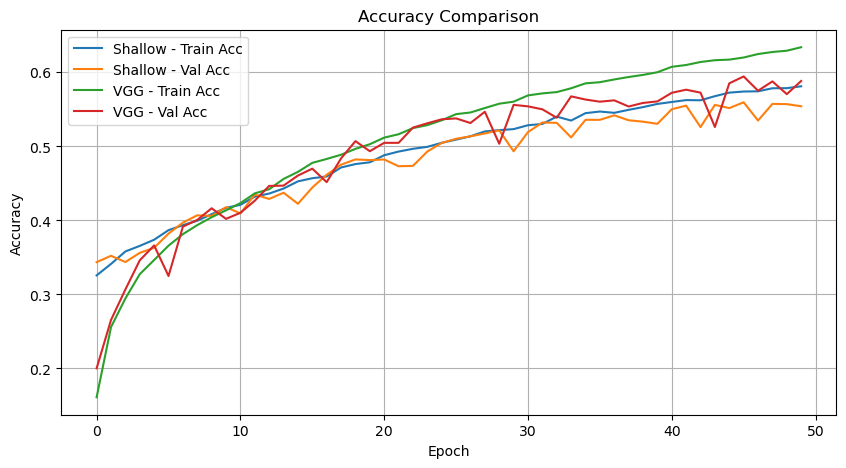

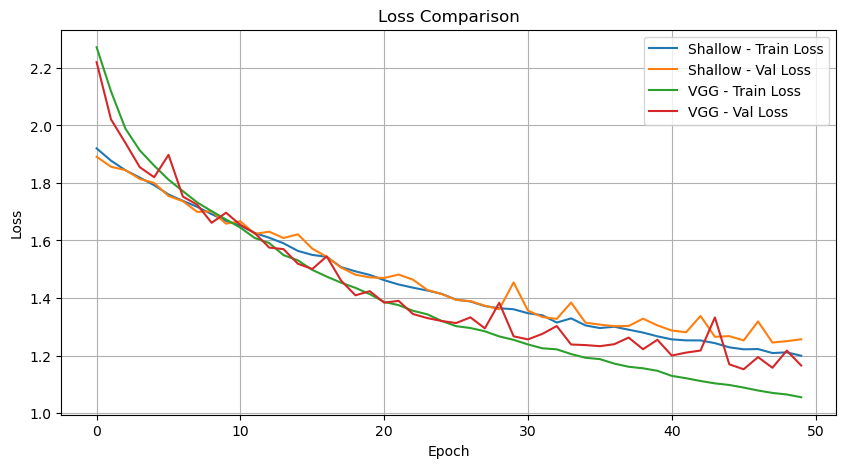

In [20]:
import matplotlib.pyplot as plt

# Accuracy comparison
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Shallow - Train Acc')
plt.plot(history.history['val_accuracy'], label='Shallow - Val Acc')
plt.plot(vgg_history.history['accuracy'], label='VGG - Train Acc')
plt.plot(vgg_history.history['val_accuracy'], label='VGG - Val Acc')
plt.title('Accuracy Comparison')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Loss comparison
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Shallow - Train Loss')
plt.plot(history.history['val_loss'], label='Shallow - Val Loss')
plt.plot(vgg_history.history['loss'], label='VGG - Train Loss')
plt.plot(vgg_history.history['val_loss'], label='VGG - Val Loss')
plt.title('Loss Comparison')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


**Comment on the observation**

*(Double-click or enter to edit)*

...

*   Use predict function to predict the output for the test split
*   Plot the confusion matrix for the new model and comment on the class confusions.


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


<Figure size 1000x800 with 0 Axes>

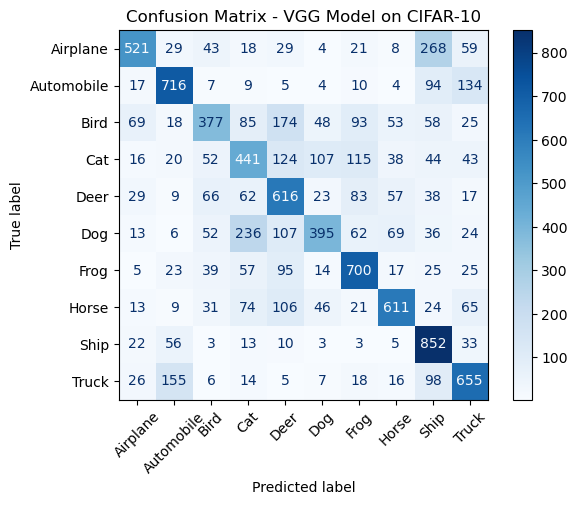

In [21]:
import numpy as np

# Get predictions from the VGG model
y_pred_probs = vgg_model.predict(x_test)

# Convert from probabilities to class labels
y_pred_classes = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test_onehot, axis=1)
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Display confusion matrix with labels
class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer',
               'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
plt.figure(figsize=(10, 8))
disp.plot(cmap='Blues', xticks_rotation=45)
plt.title("Confusion Matrix - VGG Model on CIFAR-10")
plt.show()


**Comment here :**

*(Double-click or enter to edit)*

...

*    Print the test accuracy for the trained model.

In [22]:
# Evaluate the VGG model on the test set
test_loss, test_accuracy = vgg_model.evaluate(x_test, y_test_onehot, verbose=0)

# Print test accuracy
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


Test Accuracy: 58.84%


## Define the complete VGG architecture.

Stack two convolutional layers with 64 filters, each of 3 x 3 followed by max pooling layer. 

Stack two more convolutional layers with 128 filters, each of 3 x 3, followed by max pooling, followed by two more convolutional layers with 256 filters, each of 3 x 3, followed by max pooling. 

Flatten the output of the previous layer and add a dense layer with 128 units before the classification layer. 

For all the layers, use ReLU activation function. 

Use same padding for the layers to ensure that the height and width of each layer output matches the input

*   Change the size of input to 64 x 64.

In [23]:
from keras.backend import clear_session
clear_session()

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import SGD

# Define the full VGG-like architecture
vgg_full_model = Sequential([
    # Block 1: 64 filters
    Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(64, 64, 3)),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2)),

    # Block 2: 128 filters
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2)),

    # Block 3: 256 filters
    Conv2D(256, (3, 3), activation='relu', padding='same'),
    Conv2D(256, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2)),

    # Flatten and Dense
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

vgg_full_model.compile(
    loss='categorical_crossentropy',
    optimizer=SGD(),
    metrics=['accuracy']
)

import tensorflow as tf

# Resize training and test images
x_train_resized = tf.image.resize(x_train, [64, 64])
x_test_resized = tf.image.resize(x_test, [64, 64])

vgg_full_history = vgg_full_model.fit(
    x_train_resized, y_train_onehot,
    epochs=50,
    batch_size=512,
    validation_data=(x_test_resized, y_test_onehot),
    verbose=2
)


*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 10 epochs with a batch size of 512.
*   Predict the output for the test split and plot the confusion matrix for the new model and comment on the class confusions.

In [17]:
# Your code here :

# Understanding deep networks

*   What is the use of activation functions in network? Why is it needed?
*   We have used softmax activation function in the exercise. There are other activation functions available too. What is the difference between sigmoid activation and softmax activation?
*   What is the difference between categorical crossentropy and binary crossentropy loss?

**Write the answers below :**

1 - Use of activation functions:
Activation functions introduce non-linearity into neural networks, allowing them to learn complex patterns and relationships that couldn't be captured with linear operations alone.


_

2 - Key Differences between sigmoid and softmax:

Sigmoid outputs probability (0-1) for a single class, while softmax outputs normalized probabilities across multiple classes that sum to 1, making it appropriate for multi-class classification.


_

3 - Key Differences between categorical crossentropy and binary crossentropy loss:
Binary crossentropy is used for binary classification problems (two classes), while categorical crossentropy is used for multi-class classification problems (three or more classes).

_
